In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('cars.csv')

# Display the first few rows of the dataset
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


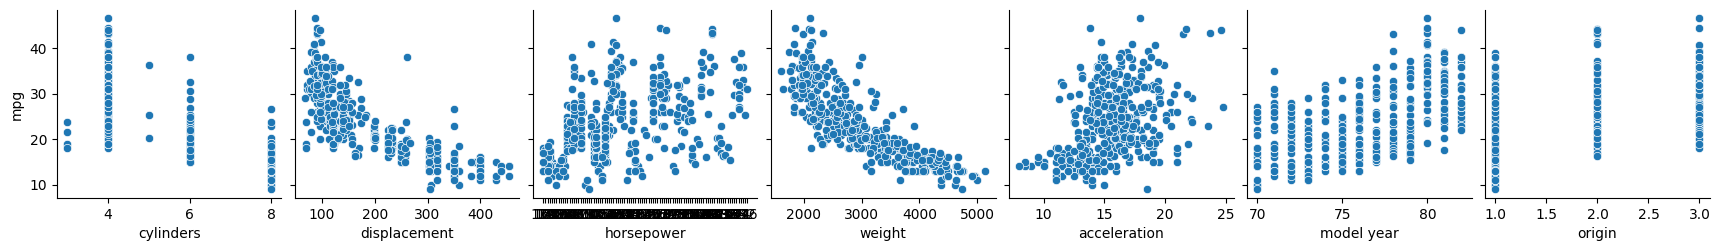

In [62]:
# Count the occurrences of each unique value in the 'mpg' column
print(df.mpg.value_counts())

# Display information about the dataset, including the data types and missing values
print(df.info())

# Pairplot to visualize relationships between variables
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], y_vars='mpg')
plt.show()

In [63]:
# Convert 'horsepower' column to numeric and drop rows with missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Prepare data for training
x = df.drop(columns=['mpg', 'car name'])
y = df['mpg']
x = sm.add_constant(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fit OLS model and display summary
model = sm.OLS(y_train, x_train).fit()
summary = model.summary()
print("Summary: ", summary)

Summary:                              OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.71e-108
Time:                        08:12:51   Log-Likelihood:                -820.59
No. Observations:                 313   AIC:                             1657.
Df Residuals:                     305   BIC:                             1687.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.8911      5.197    

In [64]:
# Fit linear regression model for 'horsepower'
X_horsepower = pd.DataFrame(df['horsepower'])
X_train_horsepower, X_test_horsepower, y_train_horsepower, y_test_horsepower = train_test_split(X_horsepower, y, test_size=0.2, random_state=0)
model_horsepower = LinearRegression()
model_horsepower.fit(X_train_horsepower, y_train)

# Calculate scores and print MAE for 'horsepower' model
train_score_horsepower = model_horsepower.score(X_train_horsepower, y_train)
test_score_horsepower = model_horsepower.score(X_test_horsepower, y_test)
print("Horsepower Model Train Score:", train_score_horsepower)
print("Horsepower Model Test Score:", test_score_horsepower)

y_pred_horsepower = model_horsepower.predict(X_test_horsepower)
mae_horsepower = mean_absolute_error(y_test_horsepower, y_pred_horsepower)
print("Mean Absolute Error (Horsepower):", mae_horsepower)

# Fit linear regression model for 'weight'
X_weight = pd.DataFrame(df['weight'])
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y, test_size=0.2, random_state=0)
model_weight = LinearRegression()
model_weight.fit(X_train_weight, y_train)

# Calculate scores and print MAE for 'weight' model
train_score_weight = model_weight.score(X_train_weight, y_train)
test_score_weight = model_weight.score(X_test_weight, y_test)
print("Weight Model Train Score:", train_score_weight)
print("Weight Model Test Score:", test_score_weight)

y_pred_weight = model_weight.predict(X_test_weight)
mae_weight = mean_absolute_error(y_test_weight, y_pred_weight)
print("Mean Absolute Error (Weight):", mae_weight)
# Fit linear regression model for 'displacement'
X_displacement = pd.DataFrame(df['displacement'])
X_train_displacement, X_test_displacement, y_train_displacement, y_test_displacement = train_test_split(X_displacement, y, test_size=0.2, random_state=0)
model_displacement = LinearRegression()
model_displacement.fit(X_train_displacement, y_train)


# Calculate scores and print MAE for 'displacement' model
train_score_displacement = model_displacement.score(X_train_displacement, y_train)
test_score_displacement = model_displacement.score(X_test_displacement, y_test)
print("Displacement Model Train Score:", train_score_displacement)
print("Displacement Model Test Score:", test_score_displacement)

y_pred_displacement = model_displacement.predict(X_test_displacement)
mae_displacement = mean_absolute_error(y_test_displacement, y_pred_displacement)
print("Mean Absolute Error (Displacement):", mae_displacement)

Horsepower Model Train Score: 0.5955625946891978
Horsepower Model Test Score: 0.6456234296465988
Mean Absolute Error (Horsepower): 3.617261227953728
Weight Model Train Score: 0.6961914927720378
Weight Model Test Score: 0.6784674595879479
Mean Absolute Error (Weight): 3.417957773983938
Displacement Model Train Score: 0.6399236624451043
Displacement Model Test Score: 0.6796867949447237
Mean Absolute Error (Displacement): 3.384703807014574


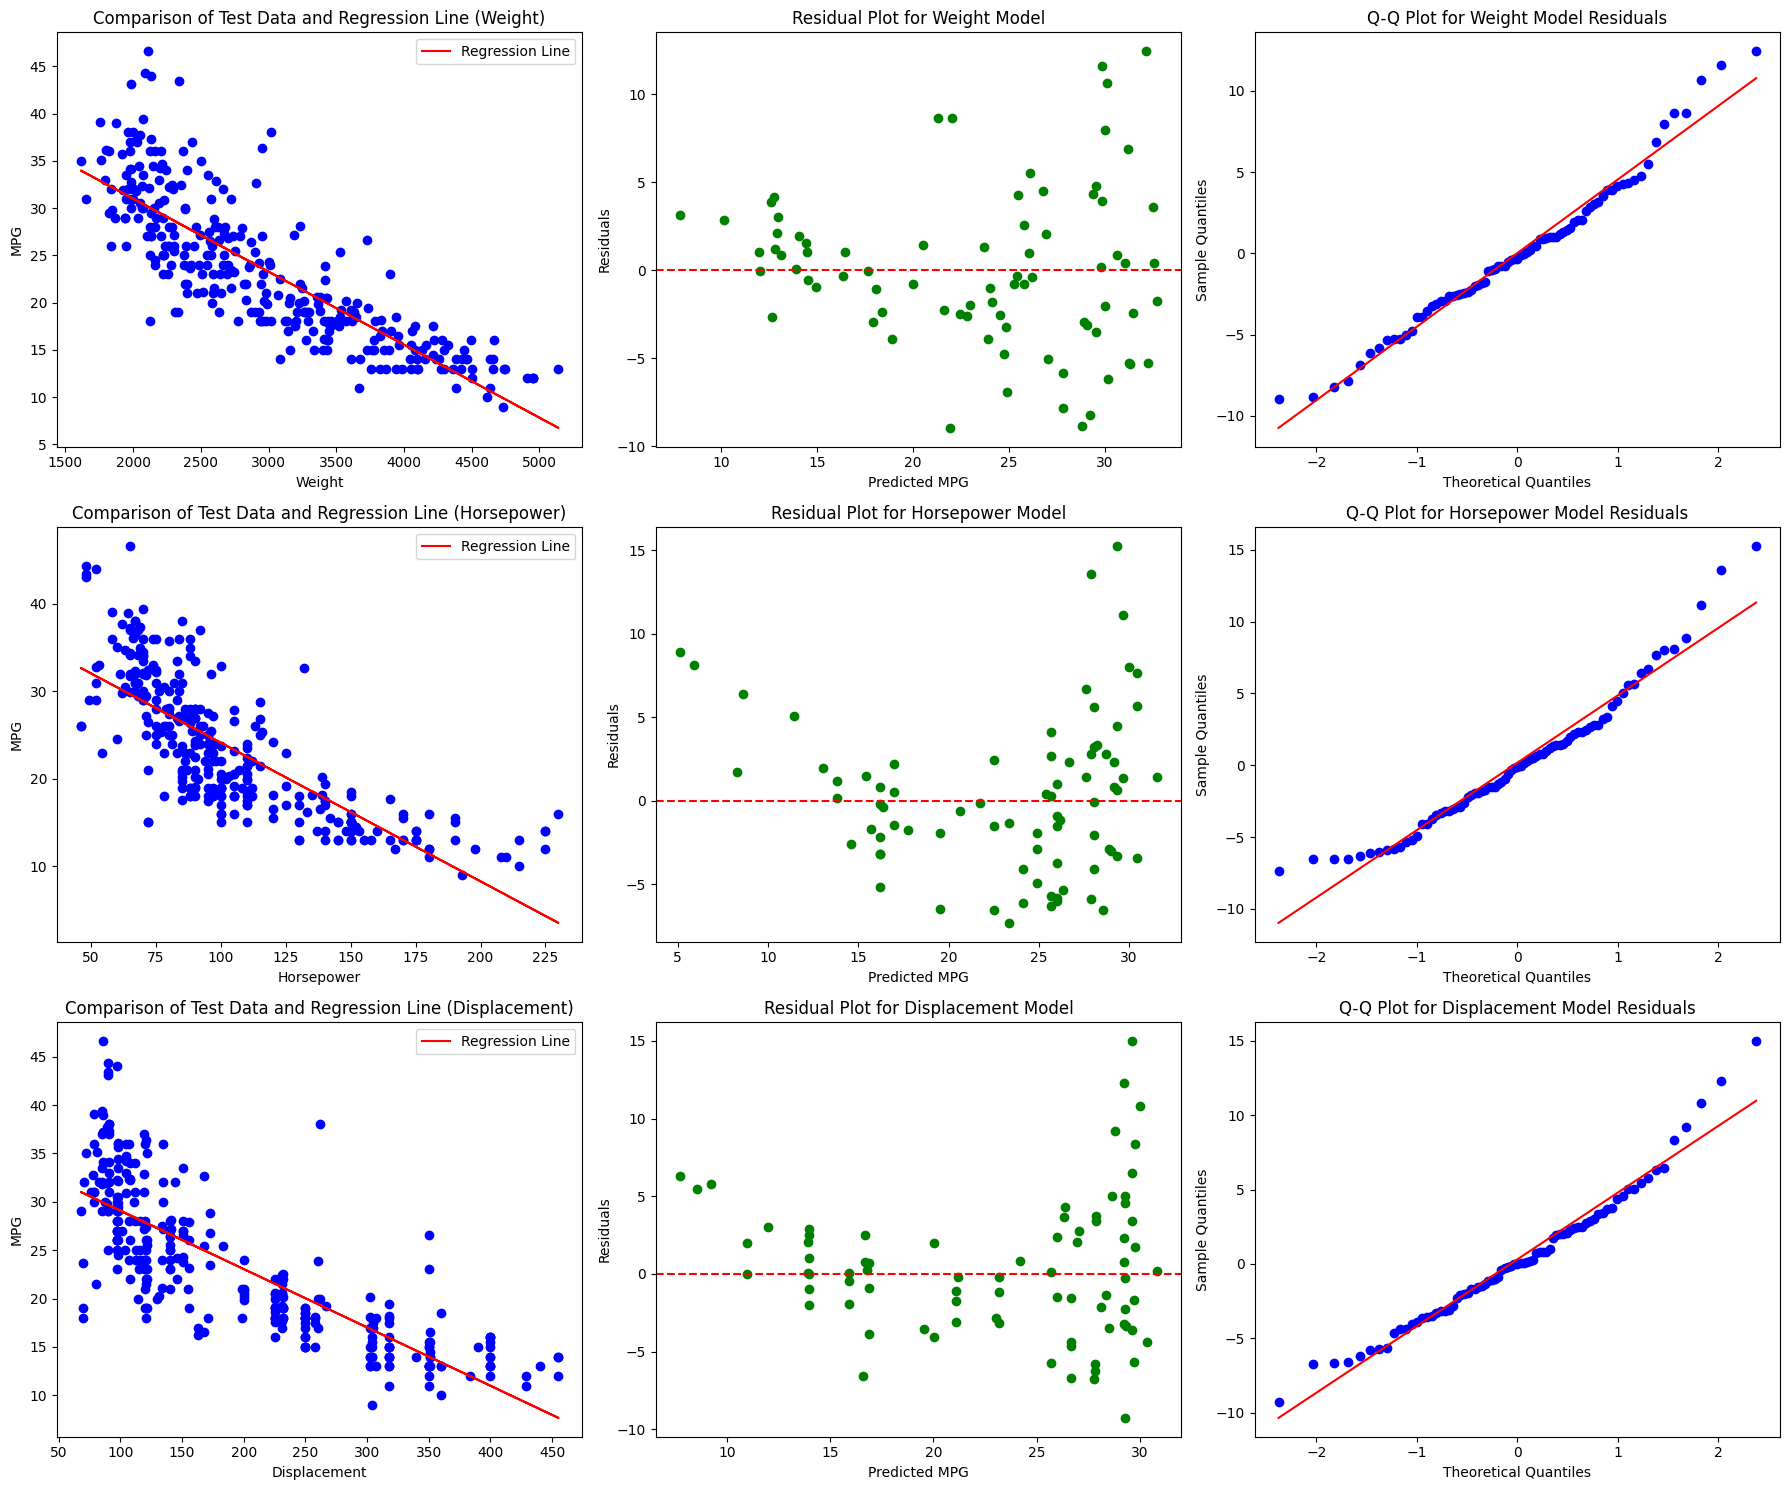

In [65]:
# Create subplots for all models
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Plot for 'weight' model
axs[0, 0].scatter(X_train_weight, y_train_weight, color='blue')
axs[0, 0].plot(X_train_weight, model_weight.predict(X_train_weight), color='red', label='Regression Line')
axs[0, 0].set_title('Comparison of Test Data and Regression Line (Weight)')
axs[0, 0].set_xlabel('Weight')
axs[0, 0].set_ylabel('MPG')
axs[0, 0].legend()

# Residual Plot for 'weight' model
axs[0, 1].scatter(model_weight.predict(X_test_weight), residuals_weight, color='green')
axs[0, 1].set_title('Residual Plot for Weight Model')
axs[0, 1].set_xlabel('Predicted MPG')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].axhline(y=0, color='red', linestyle='--')

# Q-Q Plot for 'weight' model residuals
stats.probplot(residuals_weight.squeeze(), dist="norm", plot=axs[0, 2])
axs[0, 2].set_title('Q-Q Plot for Weight Model Residuals')
axs[0, 2].set_xlabel('Theoretical Quantiles')
axs[0, 2].set_ylabel('Sample Quantiles')

# Plot for 'horsepower' model
axs[1, 0].scatter(X_train_horsepower, y_train_horsepower, color='blue')
axs[1, 0].plot(X_train_horsepower, model_horsepower.predict(X_train_horsepower), color='red', label='Regression Line')
axs[1, 0].set_title('Comparison of Test Data and Regression Line (Horsepower)')
axs[1, 0].set_xlabel('Horsepower')
axs[1, 0].set_ylabel('MPG')
axs[1, 0].legend()

# Residual Plot for 'horsepower' model
axs[1, 1].scatter(model_horsepower.predict(X_test_horsepower), residuals_horsepower, color='green')
axs[1, 1].set_title('Residual Plot for Horsepower Model')
axs[1, 1].set_xlabel('Predicted MPG')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].axhline(y=0, color='red', linestyle='--')

# Q-Q Plot for 'horsepower' model residuals
stats.probplot(residuals_horsepower.squeeze(), dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('Q-Q Plot for Horsepower Model Residuals')
axs[1, 2].set_xlabel('Theoretical Quantiles')
axs[1, 2].set_ylabel('Sample Quantiles')

# Plot for 'displacement' model
axs[2, 0].scatter(X_train_displacement, y_train_displacement, color='blue')
axs[2, 0].plot(X_train_displacement, model_displacement.predict(X_train_displacement), color='red', label='Regression Line')
axs[2, 0].set_title('Comparison of Test Data and Regression Line (Displacement)')
axs[2, 0].set_xlabel('Displacement')
axs[2, 0].set_ylabel('MPG')
axs[2, 0].legend()

# Residual Plot for 'displacement' model
axs[2, 1].scatter(model_displacement.predict(X_test_displacement), residuals_displacement, color='green')
axs[2, 1].set_title('Residual Plot for Displacement Model')
axs[2, 1].set_xlabel('Predicted MPG')
axs[2, 1].set_ylabel('Residuals')
axs[2, 1].axhline(y=0, color='red', linestyle='--')

# Q-Q Plot for 'displacement' model residuals
stats.probplot(residuals_displacement.squeeze(), dist="norm", plot=axs[2, 2])
axs[2, 2].set_title('Q-Q Plot for Displacement Model Residuals')
axs[2, 2].set_xlabel('Theoretical Quantiles')
axs[2, 2].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()